# Statistical Analysis

Descriptive, inferential, and exploratory statistical analysis including hypothesis testing, correlation analysis, and confidence intervals.

This notebook runs the analysis script: `scripts/python/statistical_analysis.py`

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, chi2_contingency, f_oneway, mannwhitneyu, shapiro, normaltest
from itertools import combinations
import os
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

# Change to project root directory
notebook_dir = os.getcwd()
project_root = os.path.dirname(os.path.dirname(notebook_dir))
os.chdir(project_root)

# Create results directories
os.makedirs('results/plots', exist_ok=True)
os.makedirs('results/tables', exist_ok=True)

# Load cleaned dataset
df = pd.read_csv('data/processed/employees_cleaned.csv')
numerical_cols = ['Salary', 'Bonus_pct', 'Years_of_Service']

print("="*80)
print("STATISTICAL ANALYSIS - EMPLOYEE DATASET")
print("="*80)
print(f'Working directory: {os.getcwd()}')
print(f'Dataset shape: {df.shape}')

STATISTICAL ANALYSIS - EMPLOYEE DATASET
Working directory: c:\Users\fresh\Desktop\DATA SCIENCE_&_PREDICTIVE ANALYTICS\emplyees
Dataset shape: (1000, 12)


## 1. Descriptive Statistics


In [2]:
# Basic descriptive statistics
print("Basic Descriptive Statistics:")
desc_stats = df[numerical_cols].describe()
print(desc_stats)
desc_stats.to_csv('results/tables/descriptive_statistics.csv')

# Additional descriptive statistics
print("\nAdditional Descriptive Statistics:")
additional_stats = pd.DataFrame({
    'Variable': numerical_cols,
    'Skewness': [stats.skew(df[col].dropna()) for col in numerical_cols],
    'Kurtosis': [stats.kurtosis(df[col].dropna()) for col in numerical_cols],
    'Variance': [df[col].var() for col in numerical_cols],
    'Coefficient of Variation': [df[col].std() / df[col].mean() * 100 for col in numerical_cols]
})
print(additional_stats)
additional_stats.to_csv('results/tables/additional_descriptive_statistics.csv')


Basic Descriptive Statistics:
              Salary    Bonus_pct  Years_of_Service
count    1000.000000  1000.000000       1000.000000
mean    90662.181000    10.207555         26.916057
std     32923.693342     5.528481         10.383638
min     35013.000000     1.015000          9.327858
25%     62613.000000     5.401750         18.117728
50%     90428.000000     9.838500         26.327173
75%    118740.250000    14.838000         35.311431
max    149908.000000    19.944000         45.815195

Additional Descriptive Statistics:
           Variable  Skewness  Kurtosis      Variance  \
0            Salary  0.047109 -1.162742  1.083970e+09   
1         Bonus_pct  0.107303 -1.176177  3.056410e+01   
2  Years_of_Service  0.128410 -1.135947  1.078199e+02   

   Coefficient of Variation  
0                 36.314694  
1                 54.160676  
2                 38.577858  


## 2. Normality Tests


Normality Test Results:
           Variable          Test   Statistic        P-value Normal
0            Salary  Shapiro-Wilk    0.957184   1.644826e-16     No
1            Salary    D'Agostino  556.820485  1.224526e-121     No
2         Bonus_pct  Shapiro-Wilk    0.952819   2.183461e-17     No
3         Bonus_pct    D'Agostino  614.579112  3.514321e-134     No
4  Years_of_Service  Shapiro-Wilk    0.957344   1.776048e-16     No
5  Years_of_Service    D'Agostino  467.181657  3.571020e-102     No


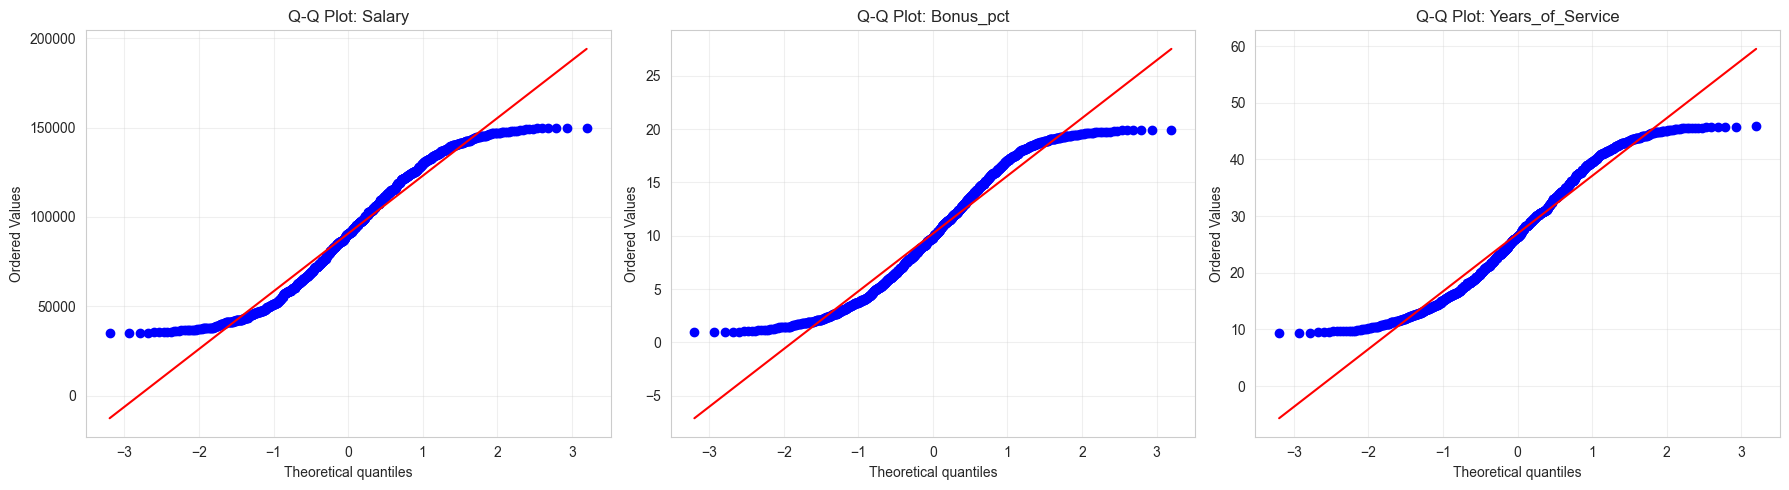

In [3]:
# Perform normality tests
normality_results = []

for col in numerical_cols:
    data = df[col].dropna()
    
    # Shapiro-Wilk test (for smaller samples)
    if len(data) <= 5000:
        stat_sw, p_value_sw = shapiro(data)
        normality_results.append({
            'Variable': col,
            'Test': 'Shapiro-Wilk',
            'Statistic': stat_sw,
            'P-value': p_value_sw,
            'Normal': 'Yes' if p_value_sw > 0.05 else 'No'
        })
    
    # D'Agostino's normality test
    stat_da, p_value_da = normaltest(data)
    normality_results.append({
        'Variable': col,
        'Test': "D'Agostino",
        'Statistic': stat_da,
        'P-value': p_value_da,
        'Normal': 'Yes' if p_value_da > 0.05 else 'No'
    })

normality_df = pd.DataFrame(normality_results)
print("Normality Test Results:")
print(normality_df)
normality_df.to_csv('results/tables/normality_tests.csv', index=False)

# Q-Q plots for normality
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(numerical_cols):
    stats.probplot(df[col].dropna(), dist="norm", plot=axes[i])
    axes[i].set_title(f'Q-Q Plot: {col}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('results/plots/qq_plots_normality.png', dpi=300, bbox_inches='tight')
plt.show()


## 3. Inferential Statistics - T-tests


In [4]:
# T-test: Salary by Gender
print("T-test: Salary by Gender")
male_salary = df[df['Gender'] == 'Male']['Salary'].dropna()
female_salary = df[df['Gender'] == 'Female']['Salary'].dropna()

t_stat_gender, p_value_gender = ttest_ind(male_salary, female_salary)
print(f"T-statistic: {t_stat_gender:.4f}")
print(f"P-value: {p_value_gender:.4f}")
print(f"Mean Male Salary: ${male_salary.mean():,.2f}")
print(f"Mean Female Salary: ${female_salary.mean():,.2f}")
print(f"Significant difference: {'Yes' if p_value_gender < 0.05 else 'No'}")

# T-test: Salary by Senior Management
print("\nT-test: Salary by Senior Management")
sm_salary = df[df['Senior_Management'] == True]['Salary'].dropna()
non_sm_salary = df[df['Senior_Management'] == False]['Salary'].dropna()

t_stat_sm, p_value_sm = ttest_ind(sm_salary, non_sm_salary)
print(f"T-statistic: {t_stat_sm:.4f}")
print(f"P-value: {p_value_sm:.4f}")
print(f"Mean Senior Management Salary: ${sm_salary.mean():,.2f}")
print(f"Mean Non-Senior Management Salary: ${non_sm_salary.mean():,.2f}")
print(f"Significant difference: {'Yes' if p_value_sm < 0.05 else 'No'}")

# Save t-test results
ttest_results = pd.DataFrame([
    {'Test': 'Salary by Gender', 'T-statistic': t_stat_gender, 'P-value': p_value_gender, 'Significant': 'Yes' if p_value_gender < 0.05 else 'No'},
    {'Test': 'Salary by Senior Management', 'T-statistic': t_stat_sm, 'P-value': p_value_sm, 'Significant': 'Yes' if p_value_sm < 0.05 else 'No'}
])
ttest_results.to_csv('results/tables/ttest_results.csv', index=False)


T-test: Salary by Gender
T-statistic: 0.5116
P-value: 0.6090
Mean Male Salary: $91,180.67
Mean Female Salary: $90,023.92
Significant difference: No

T-test: Salary by Senior Management
T-statistic: 0.2458
P-value: 0.8059
Mean Senior Management Salary: $90,935.16
Mean Non-Senior Management Salary: $90,422.04
Significant difference: No


## 4. Chi-square Tests


In [5]:
# Chi-square test: Gender and Senior Management
print("Chi-square Test: Gender and Senior Management")
contingency_table = pd.crosstab(df['Gender'], df['Senior_Management'])
print("\nContingency Table:")
print(contingency_table)

chi2_stat, chi2_p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square statistic: {chi2_stat:.4f}")
print(f"P-value: {chi2_p_value:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"Significant association: {'Yes' if chi2_p_value < 0.05 else 'No'}")

# Save chi-square results
chisquare_results = pd.DataFrame([
    {'Test': 'Gender and Senior Management', 'Chi-square': chi2_stat, 'P-value': chi2_p_value, 'Significant': 'Yes' if chi2_p_value < 0.05 else 'No'}
])
chisquare_results.to_csv('results/tables/chisquare_results.csv', index=False)


Chi-square Test: Gender and Senior Management

Contingency Table:
Senior_Management  False  True 
Gender                         
Female               231    200
Male                 227    197

Chi-square statistic: 0.0000
P-value: 1.0000
Degrees of freedom: 1
Significant association: No


## 5. ANOVA - Analysis of Variance


In [6]:
# ANOVA: Salary across Teams (top 10 teams)
print("ANOVA: Salary across Teams (Top 10 Teams)")
top_teams_anova = df['Team'].value_counts().head(10).index
df_anova = df[df['Team'].isin(top_teams_anova)]

team_groups = [df_anova[df_anova['Team'] == team]['Salary'].dropna() for team in top_teams_anova]
f_stat, p_value_anova = f_oneway(*team_groups)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value_anova:.4f}")
print(f"Significant difference: {'Yes' if p_value_anova < 0.05 else 'No'}")


ANOVA: Salary across Teams (Top 10 Teams)
F-statistic: 0.3490
P-value: 0.9582
Significant difference: No


## 6. Correlation Analysis with Significance Testing


Correlation Analysis Results:
   Variable1         Variable2  Correlation   P-value Significant
0     Salary         Bonus_pct    -0.036381  0.250392          No
1     Salary  Years_of_Service    -0.033476  0.290250          No
2  Bonus_pct  Years_of_Service     0.049242  0.119668          No


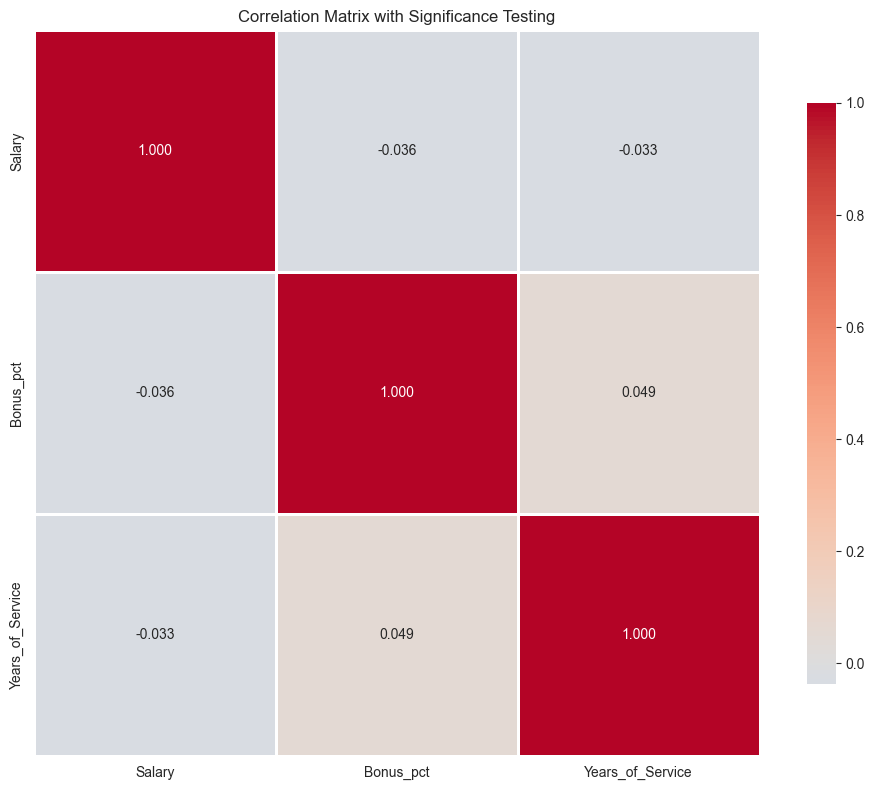

In [7]:
# Pearson correlation with significance
correlation_results = []
for i, col1 in enumerate(numerical_cols):
    for col2 in numerical_cols[i+1:]:
        data1 = df[col1].dropna()
        data2 = df[col2].dropna()
        
        # Align data
        common_idx = data1.index.intersection(data2.index)
        data1_aligned = data1[common_idx]
        data2_aligned = data2[common_idx]
        
        if len(data1_aligned) > 2:
            corr_coef, p_value = stats.pearsonr(data1_aligned, data2_aligned)
            correlation_results.append({
                'Variable1': col1,
                'Variable2': col2,
                'Correlation': corr_coef,
                'P-value': p_value,
                'Significant': 'Yes' if p_value < 0.05 else 'No'
            })

corr_df = pd.DataFrame(correlation_results)
print("Correlation Analysis Results:")
print(corr_df)
corr_df.to_csv('results/tables/correlation_analysis.csv', index=False)

# Visualize correlations
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.3f')
plt.title('Correlation Matrix with Significance Testing')
plt.tight_layout()
plt.savefig('results/plots/correlation_matrix_statistical.png', dpi=300, bbox_inches='tight')
plt.show()


## 7. Confidence Intervals


In [8]:
# Calculate 95% confidence intervals
confidence_intervals = []
confidence_level = 0.95

for col in numerical_cols:
    data = df[col].dropna()
    n = len(data)
    mean = data.mean()
    std_err = stats.sem(data)
    h = std_err * stats.t.ppf((1 + confidence_level) / 2, n-1)
    
    confidence_intervals.append({
        'Variable': col,
        'Mean': mean,
        'Std Error': std_err,
        'Lower CI (95%)': mean - h,
        'Upper CI (95%)': mean + h,
        'Margin of Error': h
    })

ci_df = pd.DataFrame(confidence_intervals)
print("95% Confidence Intervals:")
print(ci_df)
ci_df.to_csv('results/tables/confidence_intervals.csv', index=False)


95% Confidence Intervals:
           Variable          Mean    Std Error  Lower CI (95%)  \
0            Salary  90662.181000  1041.138599    88619.111559   
1         Bonus_pct     10.207555     0.174826        9.864487   
2  Years_of_Service     26.916057     0.328359       26.271704   

   Upper CI (95%)  Margin of Error  
0    92705.250441      2043.069441  
1       10.550623         0.343068  
2       27.560411         0.644353  
